# Scraping topstartups.io

### Anh Thu Le, Lily Jiang

## Introduction
Here is the scenario: You are given an absurd amount of money for your VC fund, perhaps from some gracious and benevolent billionaires. You have to find startups to invest in, but you have hundreds of pitch decks to look over. What exactly are you looking for?

Investors want the most bang for their buck. Who doesn't? Thus it is important for investors to know exactly what to look for in a company before deciding to invest. And furthermore, the complexity in an investor's decision comes not just with who to invest in, but when to invest. An earlier investment will obviously turn a larger profit, but a later investment is much safer as the company will have demonstrated tangible success. Such decisions are even more overwhelming when considering the sheer number of new startups in this day and age.

To narrow the company search, it is beneficial to analyze successful startup companies for trends. Perhaps a specific industry outperforms others, fundraising-wise. Perhaps there are interesting statistical trends when comparing the fundraising levels. There is a lot to consider about what you look for in a company before investing, which is why this notebook exists. We will be examining over 1200 companies from topstartups.io. With these companies, we will be generating graphs comparing fundraising values across industries, across seed and series rounds, and against a company's number of employees.

## Methodology

After identifying what website we wanted to scrape, we built a webscraper for the site's HTML using BeautifulSoup. topstartups.io has a "show more" button to prevent all 1200+ companies from loading at the same time. This button actually linked to another url - pages 2, 3, 4, all the way to 68 of the site. Thus, we looped through the urls just changing the page number each time, and scraped data about each company. In particular, we scraped:
* the company name
* the industries the company fit into
* how many employees the company has
* how much was raised in their latest fundraising round

After scraping this data, it was stored in a .json file to be referenced in analysis. Here, the keys were the company names, and the values were tuples of 3 values: an array of industries, the number of employees, and a tuple consisting of the type of fundraising and the value raised.

To parse this data to generate plots, we used json's functions to automatically parse the file as a dictionary. With this data, we were able to easily manipulate it into arrays that could be plotted using matplotlib. There are three graphs generated in total: comparing fundraising values of 4 industries against each other, funding values across seed/series rounds in one industry, and fundraised value vs. the number of employees for all companies.

With that overview, let's jump into the actual visualization! Before running any code though, run the cell below to ensure all the referenced files are up to date.

In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


All of the data from topstartups.io has already been scraped beforehand to improve effiency with this notebook. It is currently stored in the json file `topstartups_data.json`. The first thing we want to do is read in the data we need from this file, and store it into an array. Each line in the json file corresponds with one value in the array. This makes working with the data in the rest of this notebook a lot simpler.

Additionally in this cell, we will import matplotlib.pyplot which will help in generating plots for quantitative analysis.

Run the code cell below to set the infrastructure for the data visualization.

In [28]:
import json
import matplotlib.pyplot as plt

with open('topstartups_data.json', 'r') as file:
    startup_data = json.load(file)

### Funding Across Various Industries

To start off, we will be analyzing the average funding across various industries. Specifically, we will be comparing 4 of the largest industries: SaaS, FinTech, Apps, and Consumer. Note that some companies are a part of multiple industries, so they will count towards both.

If you want to see data for other industries, swap the names for what you want to see (make sure to type the name in exactly as it appears). Some popular industries are listed below:

* Enterprise Software
* Artificial Intelligence
* Crypto
* E-Commerce
* VR
* Analytics
* SaaS
* FinTech
* Apps
* Consumer

Additionally, the graph may be hard to read because much of the data is concentrated in a small amount of the range, so we have coded it so that just the box and whiskers are being shown at a good scale. If you wish to see the entire plot with outliers, uncomment out the corresponding line below and run.

Run the cell below to filter out companies based on industry.

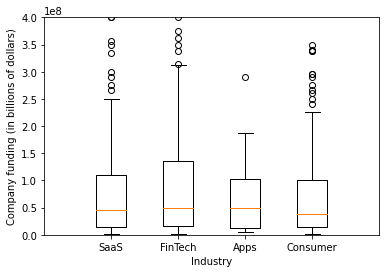

In [29]:
from topstartups_data_analysis_helpers import filter_data_for_funds

# make arrays, with first row as the names of the industries and the columns the average funding values for each 
industry_1_data = filter_data_for_funds("SaaS", startup_data)
industry_2_data = filter_data_for_funds("FinTech", startup_data)
industry_3_data = filter_data_for_funds("Apps", startup_data)
industry_4_data = filter_data_for_funds("Consumer", startup_data)


# compile dataset
data = [industry_1_data[1:], industry_2_data[1:], industry_3_data[1:], industry_4_data[1:]]

# comment one of these out to generate different plot scales
#plt.figure(figsize =(8, 25))
plt.axis([0, 5, 0, 400000000])

# Create plot and show it
boxplot_1 = plt.boxplot(data)
plt.xlabel("Industry")
plt.ylabel("Company funding (in billions of dollars)")
plt.xticks([1, 2, 3, 4], [industry_1_data[0], industry_2_data[0], industry_3_data[0], industry_4_data[0]])
plt.show()

Now we can put some numbers behind this graph, notably the medians. It's not very easy to directly compare the median values based on the scale of this graph, so finding the numerical values will help.

In [30]:
median_1 = []
for median_line in boxplot_1['medians']:
    linedata = median_line.get_ydata()
    median_1.append(linedata[0])

print(median_1)

[45000000.0, 50000000.0, 50000000.0, 38000000.0]


One important feature to note about this plot is that almost all the data points are concentrated towards the lower end, below $1 billion, with a huge margin between points on the higher end (over $1 billion in some cases). This is one of the benefits of plotting this particular data using a boxplot rather than a bar graph of averages. These extreme outliers would skew the data. 

### Funding Breakdown Within a Single Industry

Now that we know the most profitable industry across the four we have examined (spoiler alert if you haven't run the previous cell: it's FinTech!), we should take a deeper dive into the industry's funding stats.

An investor who wants to know their money is going to a good place will be more interested in this industry, so we will dive deeper into FinTech specifically. With this graph, we will be comparing the amount raised across different funding rounds.

Run the cell below to see the breakdown for the various funding rounds look. And of course, if you're interested in any other industry, change the name to one of the valid industry names.

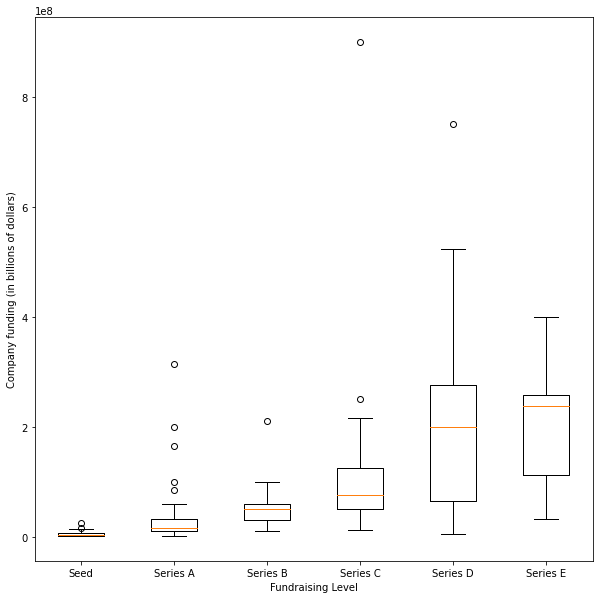

In [31]:
from topstartups_data_analysis_helpers import filter_by_series

series_data = filter_by_series("FinTech", startup_data)

# compile dataset
data = [series_data['Seed'], series_data['Series A'], series_data['Series B'], series_data['Series C'], series_data['Series D'], series_data['Series E']]

plt.figure(figsize = (10, 10))

# Create a boxplot and display it
boxplot_2 = plt.boxplot(data)
plt.xlabel("Fundraising Level")
plt.ylabel("Company funding (in billions of dollars)")
plt.xticks([1, 2, 3, 4, 5, 6], ['Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E'])
plt.show()

And once again, let's find the numerical values for the medians to compare.

In [32]:
median_2 = []
for median_line in boxplot_2['medians']:
    linedata = median_line.get_ydata()
    median_2.append(linedata[0])

print(median_2)

[3000000.0, 16000000.0, 50000000.0, 75000000.0, 200000000.0, 237500000.0]


This plot is intriguing because of the consistent increase in raised amount across fundraised levels until Series E. Series D has a much higher upper range than Series E, yet Series E has a higher median. Because there wasn't enough data to plot anything above Series E, we don't know whether this is an indication that Series D is a 'peak' of the fundraising world, or if Series E is simply displaying abnormal behavior.

Another interesting feature is that in Series A, there are a lot of outliers investing well above the expected range. There are 5 outliers, compared to only one or two in the other fundraising rounds. This is a possible indication that investors are generally more willing to place huge "bets" on companies that move past the seed round. Series A is essentially the earliest that an investor can get in on the company, other than seed round. Thus it makes sense that there would be some higher, "riskier" investments in Series A.

### Number of Employees and Funding Value

Another interesting aspect about companies that may impact their funding value is the number of employees they have. A higher number of employees may suggest a higher funding value, because they are perhaps more established. Or perhaps the inverse may be true: a higher funding value meant that the company can hire more employees. While this causation cannot be determined purely from the data we have, a correlation can certainly be established.

In this third graph, we will be plotting each company's funding value vs. their number of employees. We will be using a scatter plot to best establish this correlation/lack of correlation. Each point on the plot represents one company.

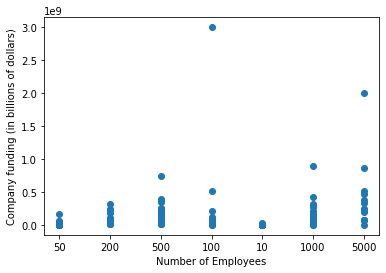

In [33]:
from topstartups_data_analysis_helpers import find_num_employees
from topstartups_data_analysis_helpers import find_funding_values

# list of employees, which will be plotted on the x-axis
x = find_num_employees("FinTech", startup_data)

# list of funding values, plotted on the y-axis
y = find_funding_values("FinTech", startup_data)

plt.scatter(x, y)
plt.xlabel("Number of Employees")
plt.ylabel("Company funding (in billions of dollars)")
plt.show()

## Conclusion

Ultimately, the most important thing to take away from this notebook is that investments can be driven by data science. There are clear correlations and monetary comparisons to be made based on existing company data that can help guide future investments. The major implication of this project is that investment choices can be swayed based on the factors analyzed in this notebook. This then shapes the innovation field, as the products and companies that are funded more can dominate innovation easier than others. On an individual level, investors may find a huge breakthrough by choosing investment choices wisely. Their lives could change for the better in just a few weeks.

While doing the project, the prominent lesson we learned was to ensure the data collection is solid before moving forward with anything. We had the notable struggle of finding a solid and interesting website to scrape, and pivoted multiple times a day which caused the programming aspect to move slowly. This project would've been completed so much more efficiently if we had proactively considered issues surrounding how there was too little data, the website required webdrivers to fully scrape, and more. This is absolutely a lesson we will be taking with us in the future, so that we do not encounter similar roadblocking challenges. Another lesson we learned was to plan out what graphs to generate before scraping the data. We had to rewrite the webscraper multiple times because we realized we wanted a graph but didn't scrape specifically for that data. Or if there was too much data being scraped, we had to eliminate some.

if we had more time on this project, we would do a more thorough analysis of how the company's impact/valuation compared with their funding, because this would help investors in finding quantitative trends. Having this 'impact' would more directly pertain to the level of investment returns.